# **WIP**

3 Topics: (Undecided)
  1. Impact of AI on teaching and learning
  2. Ethical concerns about AI in education
  3. Implementation of AI in education tools

## **Download required libraries**

In [17]:
!pip install gensim
!pip install pyLDAvis
!pip install whatthelang

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Download stopwords from nltk**

## **Import required libraries**

In [18]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# vis
import pyLDAvis
import pyLDAvis.gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Data preprocessing**

In [46]:
import re
import pandas as pd
from whatthelang import WhatTheLang

wtl = WhatTheLang()

# Function to classify content as 'English' or 'Taglish'
def classify_language(text):
    predicted_lang = wtl.predict_lang(text)
    if predicted_lang == 'en':
        return 'English'
    elif predicted_lang == 'tl':
        return 'Taglish'
    else:
        return 'Taglish'  # Default to Taglish

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Load the dataset
df = pd.read_csv("AI in edu dataset - Sheet1.csv")

# Remove null values
df = df.dropna(subset=['Content'])

# Remove all columns except content
df = df.drop(columns=['Platform', 'Sentiment'])

# Remove newlines from content
df = df.map(lambda x: re.sub(r'\n', '', x))

# Remove punctuation
df = df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert to lowercase
df = df.map(lambda x: x.lower())

# Remove emojis
df = df.map(lambda x: remove_emojis(x))

# Apply the classification to the 'Content' column
df['Predicted_Language'] = df['Content'].map(classify_language)

english_df = df[df['Predicted_Language'] == 'English']
taglish_df = df[df['Predicted_Language'] == 'Taglish']

# Count the number of English and Taglish texts
language_counts = df['Predicted_Language'].value_counts()

# Print the number of English and Taglish texts
print("Language Count:")
print(language_counts)

# Remove all columns except content since it is not needed anymore
english_df = english_df.drop(columns='Predicted_Language')
taglish_df = taglish_df.drop(columns='Predicted_Language')

# Display the first few rows of the preprocessed data
english_df.head()
taglish_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:47: DeprecationWarning: invalid escape sequence '\.'
<>:47: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-46-f0c2f24f0326>:47: DeprecationWarning: invalid escape sequence '\.'
  df = df.map(lambda x: re.sub('[,\.!?]', '', x))


Language Count:
Predicted_Language
English    293
Taglish    143
Name: count, dtype: int64


,Content
225,ok sya nagbibigay ng idea at pang research mas...
227,kung aasa kayo sa ai to do school work kayo di...
229,nakakadismaya panahon ngayon mga kabataan ngay...
230,para sa akin i like ai to be a mainstream thin...
233,sobrang dali ng matuto ng students ngayon kami...


## **Data Exploration**

### **Using a Wordcloud to get the most common words in the data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


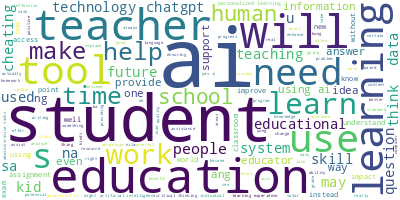

In [42]:
# ENGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(english_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


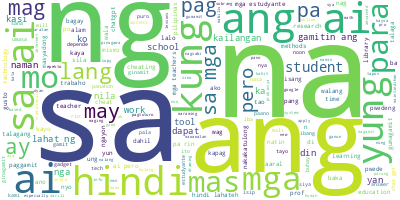

In [43]:
# TAGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(taglish_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

## **Data Preparation for LDA**

## **Lemmatization and removal of stopwords**

In [6]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

english_stop_words = set(stopwords.words('english'))
tagalog_stop_words = set()
with open('tagalog_stop_words.txt', 'r') as file:
  for line in file:
    tagalog_stop_words.add(line.strip())

# Combine English and Tagalog stop words into one set
combined_stop_words = english_stop_words.union(tagalog_stop_words)

# Function to process each document (tokenization, stopword removal, lemmatization)
def preprocess(document):
  tokens = gensim.utils.simple_preprocess(str(document), deacc=True)
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stop_words]
  return tokens

# Convert the DataFrame content into a list of documents
data = df.values.tolist()

processed_data = [preprocess(doc) for doc in data]

# Display the first 5 processed documents
print(processed_data[:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['education', 'system', 'ai', 'destroy', 'system', 'adapt', 'change', 'world', 'ai'], ['ai', 'tool', 'sare', 'helpful', 'need', 'use', 'properly', 'going', 'replace', 'human', 'still', 'need', 'human', 'touch'], ['ai', 'teacher', 'join', 'force', 'collaborative', 'effort', 'revolutionize', 'education', 'ai', 'teacher', 'empower', 'student', 'best'], ['kid', 'learn', 'use', 'ai', 'realize', 'career', 'obsolete', 'ai', 'take', 'smarter', 'path'], ['thing', 'embrace', 'ai', 'student', 'ever', 'learn', 'form', 'opinion', 'ask', 'ai', 'form']]


## **Dictionary and corpus creation**

In [7]:
# Create Dictionary
id2word = corpora.Dictionary(processed_data)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in processed_data]

# Display Results
print(corpus[:1][0][:15])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model Training**

### **Single-core training**


In [26]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=3, id2word=id2word, passes=10, alpha='auto', eta='auto')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Display Topics**

In [27]:
num_topics = lda_model.num_topics

# Print each topic with its top words
for topic_id in range(num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=10)  # Get top 10 words for each topic
    print(f"Topic #{topic_id}:")
    print(", ".join([f"{word} ({round(weight, 4)})" for word, weight in topic_terms]))
    print()

Topic #0:
ai (0.05779999867081642), student (0.03370000049471855), teacher (0.01549999974668026), learning (0.014999999664723873), education (0.013299999758601189), tool (0.008999999612569809), use (0.008500000461935997), need (0.008299999870359898), help (0.005900000222027302), learn (0.005900000222027302)

Topic #1:
ai (0.03970000147819519), yung (0.012000000104308128), lang (0.008500000461935997), mo (0.007400000002235174), education (0.0071000000461936), naman (0.006200000178068876), pag (0.005799999926239252), student (0.00559999980032444), ba (0.00559999980032444), yan (0.005400000140070915)

Topic #2:
ai (0.020600000396370888), mo (0.00860000029206276), mag (0.007199999876320362), education (0.005900000222027302), skill (0.004999999888241291), school (0.004999999888241291), tool (0.004900000058114529), lang (0.004399999976158142), one (0.00419999985024333), thinking (0.00419999985024333)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.115243 -0.004128       1        1  57.311019
1      0.062465 -0.071597       2        1  26.042799
2      0.052778  0.075725       3        1  16.646183, topic_info=         Term        Freq       Total Category  logprob  loglift
1506     yung   32.000000   32.000000  Default  30.0000  30.0000
1521       mo   28.000000   28.000000  Default  29.0000  29.0000
26    teacher   71.000000   71.000000  Default  28.0000  28.0000
1495     lang   23.000000   23.000000  Default  27.0000  27.0000
25    student  164.000000  164.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
173    people    3.904030   20.994959   Topic3  -5.7975   0.1107
62       also    4.006446   24.254207   Topic3  -5.7716  -0.0077
10       need    3.760553   41.688598   Topic3  -5.8349  -0.6127
25    student    4.243870  164.606027   Topic3  -5.7140  -1.8651
1496       ma    3.213108   20.428197   Topic3  -5.9922  -0.0567

[222 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1318      3  0.518141          actual
126       1  0.474241        actually
126       3  0.474241        actually
0         1  0.857809           adapt
263       1  0.975873  administrative
...     ...       ...             ...
1726      1  0.363562             yun
1726      2  0.605937             yun
1506      1  0.092728            yung
1506      2  0.741823            yung
1506      3  0.154547            yung

[283 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

## **Coherence Score**

In [29]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.3843442070963783


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
